<a href="https://colab.research.google.com/github/AEE099/Unsupervised-Learning-Diabetes/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("diabetes.csv")

#EDA
print ("Head: \n" ,df.head())
print ("Tail: \n", df.tail())
print ("Shape: \n" ,df.shape)
print ("Info: \n" ,df.info())
print ("Describe: \n" ,df.describe)

Head: 
    PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0  
Tail: 
       PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
9995    1469198         

In [ ]:
#Basic EDA
print ("Verificar si hay nulos\n:" ,df.isnull().sum())
print ("verificar duplicados:\n ", df.duplicated().sum())


Verificar si hay nulos
: PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64
verificar duplicados:
  0


Histograma:
 [[<Axes: title={'center': 'PatientID'}>
  <Axes: title={'center': 'Pregnancies'}>
  <Axes: title={'center': 'PlasmaGlucose'}>]
 [<Axes: title={'center': 'DiastolicBloodPressure'}>
  <Axes: title={'center': 'TricepsThickness'}>
  <Axes: title={'center': 'SerumInsulin'}>]
 [<Axes: title={'center': 'BMI'}>
  <Axes: title={'center': 'DiabetesPedigree'}>
  <Axes: title={'center': 'Age'}>]
 [<Axes: title={'center': 'Diabetic'}> <Axes: > <Axes: >]]


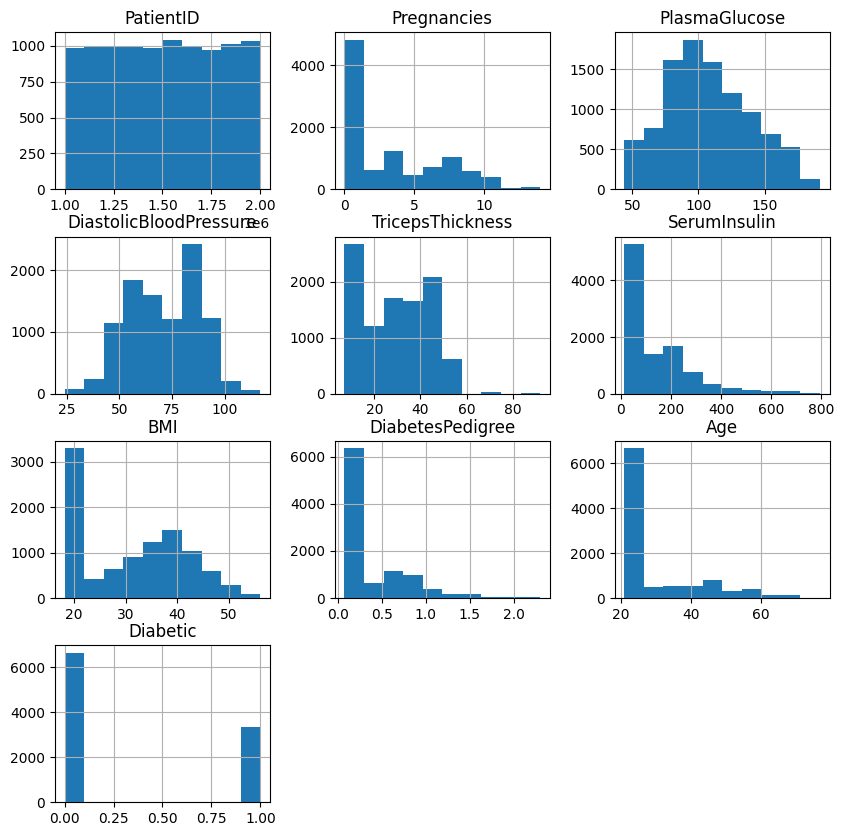

In [ ]:
print ("Histograma:\n", df.hist(figsize=(10,10)))


correlaciones: 
                         PatientID  Pregnancies  PlasmaGlucose  \
PatientID                1.000000     0.004579       0.004778   
Pregnancies              0.004579     1.000000       0.055883   
PlasmaGlucose            0.004778     0.055883       1.000000   
DiastolicBloodPressure   0.015062     0.050251       0.009093   
TricepsThickness        -0.003760     0.059983       0.026193   
SerumInsulin            -0.028858     0.115830       0.028525   
BMI                     -0.005280     0.098109       0.022023   
DiabetesPedigree        -0.021706     0.056039       0.011044   
Age                     -0.010009     0.144361       0.036698   
Diabetic                -0.021959     0.405161       0.128800   

                        DiastolicBloodPressure  TricepsThickness  \
PatientID                             0.015062         -0.003760   
Pregnancies                           0.050251          0.059983   
PlasmaGlucose                         0.009093          0.02619

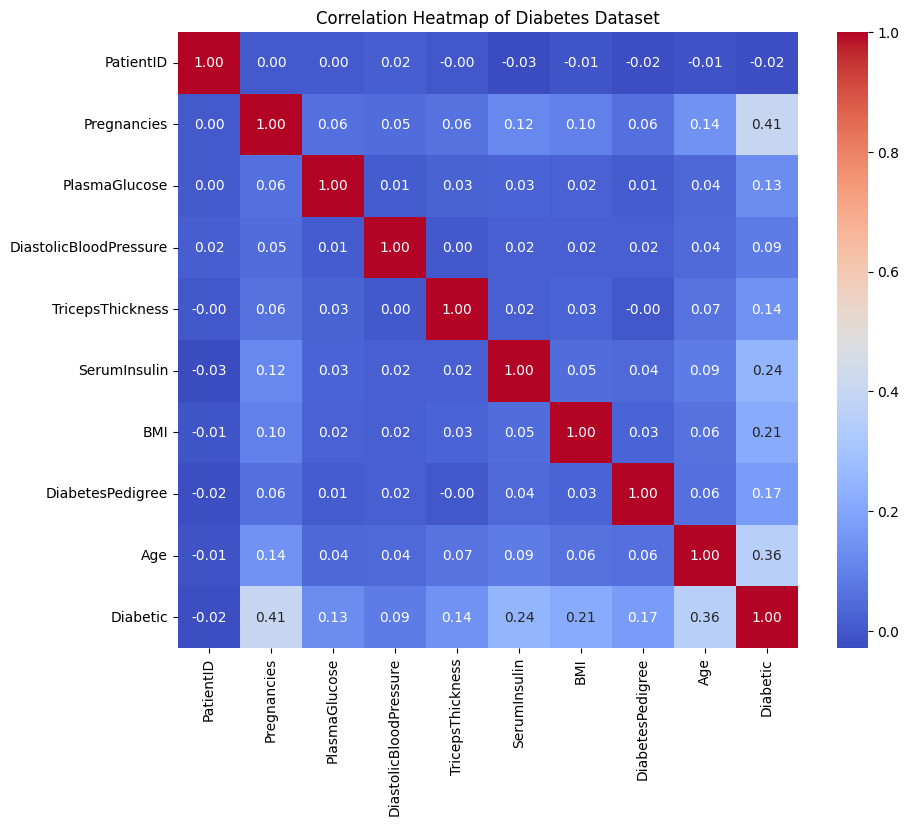

In [ ]:
print ("correlaciones: \n", df.corr())

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

#Escalado
"""Se eliminaron ceros en variables fisiológicas que no pueden ser cero (ej. glucosa, presión).

Se imputaron valores faltantes con la mediana para evitar sesgos.

Se aplicó escalado estándar (StandardScaler) para normalizar las variables numéricas.

No se aplicó codificación porque no hay variables categóricas en este dataset.
from sklearn.preprocessing import StandardScaler"""

x=df.drop ("Diabetic", axis=1)
x=x.fillna(x.median())
y=df["Diabetic"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score , davies_bouldin_score

inertias=[]
silhouettes=[]
davies=[]

for k in range (2,11):
  kmeans=KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(x_scaled
                              )
  inertias.append(kmeans.inertia_)
  silhouettes.append(silhouette_score(x_scaled,labels))
  davies.append(davies_bouldin_score(x_scaled, labels))

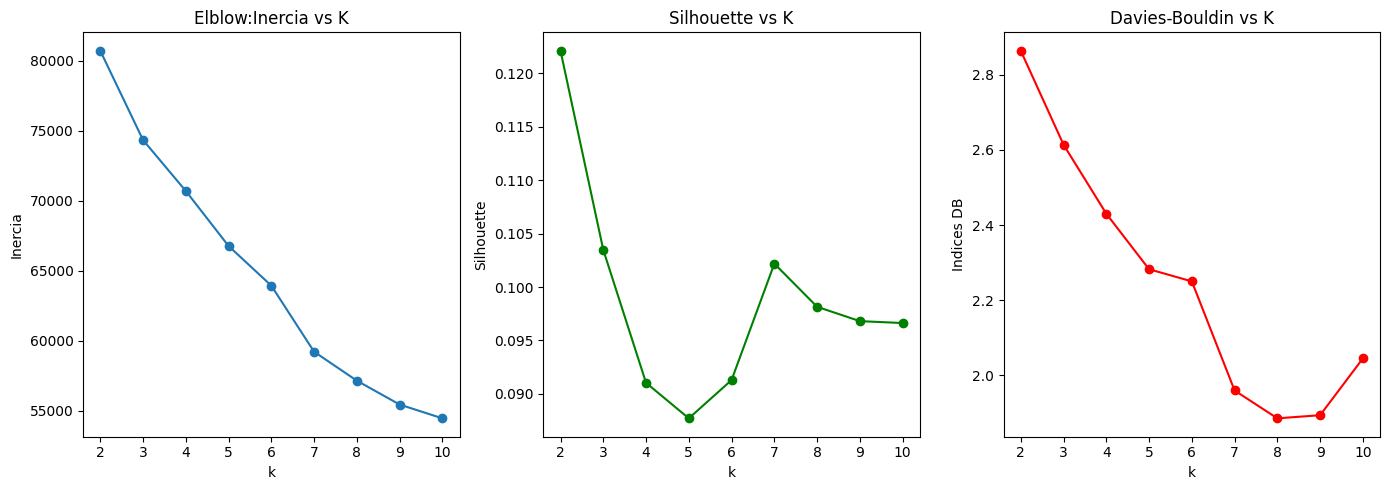

In [ ]:
#Resultados

import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))

#Elblow plot
plt.subplot(1,3,1)
plt.plot(range(2,11), inertias, marker="o")
plt.title ("Elblow:Inercia vs K")
plt.xlabel("k")
plt.ylabel("Inercia")

#Silhoutter
plt.subplot(1,3,2)
plt.plot(range(2,11), silhouettes, marker="o", color="green")
plt.title("Silhouette vs K")
plt.xlabel("k")
plt.ylabel("Silhouette")

#Dvies-bouldin
plt.subplot(1,3,3)
plt.plot(range(2,11), davies, marker="o", color="red")
plt.title("Davies-Bouldin vs K")
plt.xlabel("k")
plt.ylabel("Indices DB")


plt.tight_layout()
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score , davies_bouldin_score

for cov_type in ["full", "tied", "diag", "spherical"]:
  gmm= GaussianMixture(n_components=7, covariance_type=cov_type, random_state=42)
  labels_gmm=gmm.fit_predict(x_scaled)
  sil= silhouette_score(x_scaled, labels_gmm)
  db= davies_bouldin_score(x_scaled, labels_gmm)

  print(f"GMM ({cov_type}) - Silhouette:{sil:.3f}, DB: {db:.3f}")



GMM (full) - Silhouette:0.032, DB: 2.536
GMM (tied) - Silhouette:0.088, DB: 1.989
GMM (diag) - Silhouette:0.034, DB: 2.509
GMM (spherical) - Silhouette:0.095, DB: 1.979


In [ ]:
#DBSCAN con parametros

from sklearn.cluster import DBSCAN

for eps in [0.5, 1.0, 1.5]:
  for min_samples in [5,10]:
    dbscan=DBSCAN(eps=eps, min_samples=min_samples)
    labels_dbscan= dbscan.fit_predict(x_scaled)
    n_clusters= len(set(labels_dbscan) )- (1 if -1 in labels_dbscan else 0)
    if n_clusters>1:
     sil= silhouette_score(x_scaled, labels_dbscan)
     db= davies_bouldin_score(x_scaled, labels_dbscan)
     print (f"DBSCAN (eps={eps}, min_samples={min_samples} - Cluster: {n_clusters}, Silhouette: {sil:.3f}, DB: {db:.3f})")




DBSCAN (eps=0.5, min_samples=5 - Cluster: 5, Silhouette: -0.245, DB: 1.390)
DBSCAN (eps=1.0, min_samples=5 - Cluster: 42, Silhouette: -0.372, DB: 1.631)
DBSCAN (eps=1.0, min_samples=10 - Cluster: 14, Silhouette: -0.291, DB: 1.742)
DBSCAN (eps=1.5, min_samples=5 - Cluster: 6, Silhouette: -0.044, DB: 1.931)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score , davies_bouldin_score

kmeans= KMeans(n_clusters=7, random_state=42)
labels_kmeans= kmeans.fit_predict(x_scaled)
sil_kmeans= silhouette_score(x_scaled, labels_kmeans)
db_kmeans= davies_bouldin_score(x_scaled, labels_kmeans)
print(f"K-Means → Silhouette: {sil_kmeans:.3f}, DB: {db_kmeans:.3f}")

K-Means → Silhouette: 0.102, DB: 1.960


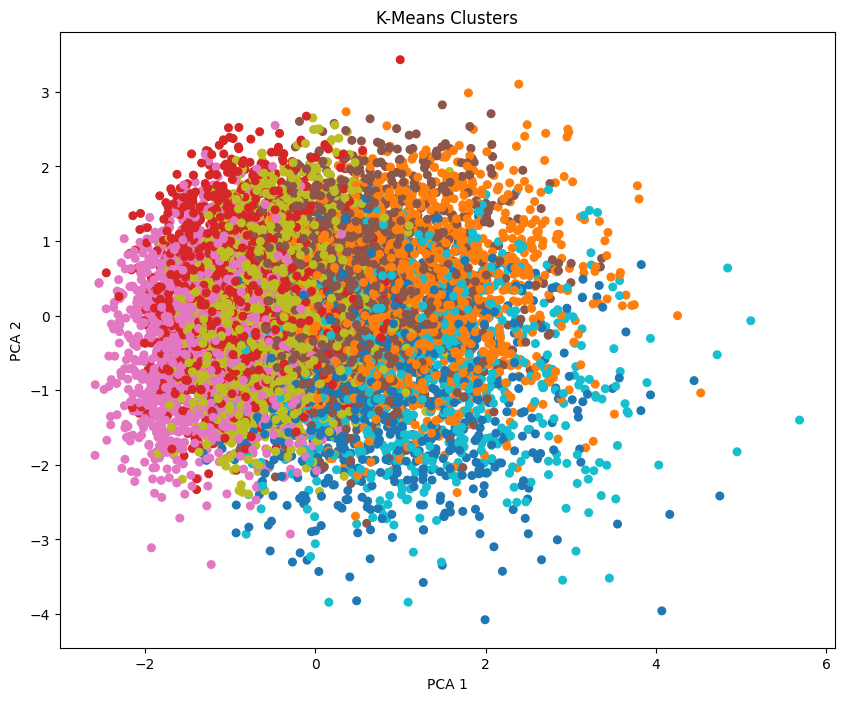

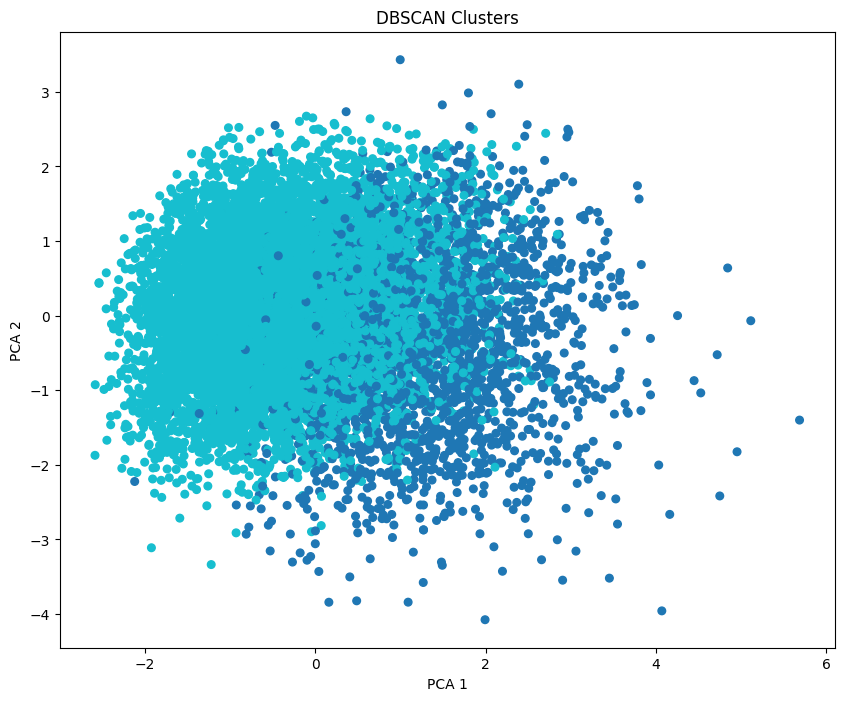

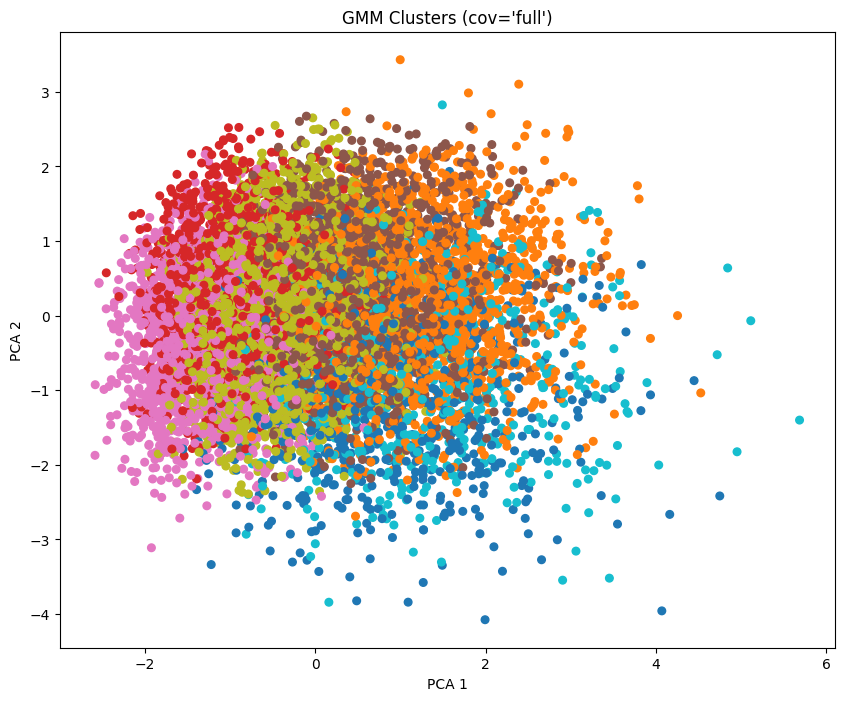

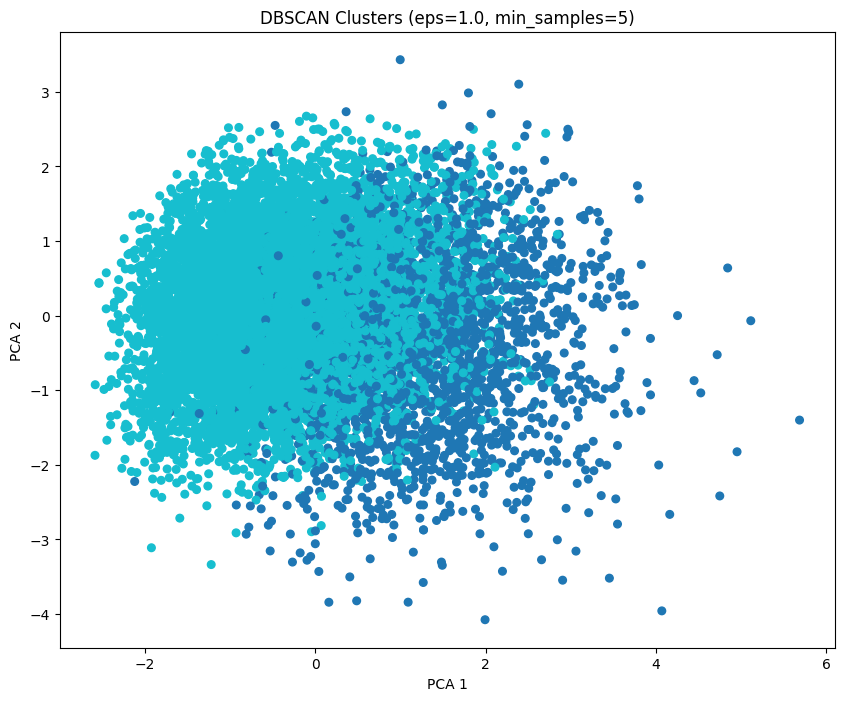

In [ ]:
#Visualizacion con PCA
from sklearn.decomposition import PCA

def plot_clusters(x, labels, title):
  pca= PCA(n_components=2)
  x_pca= pca.fit_transform(x)
  plt.figure( figsize=(10,8))
  plt.scatter (x_pca[:,0], x_pca[:,1], c=labels,cmap="tab10", s=30)
  plt.title(title)
  plt.xlabel("PCA 1")
  plt.ylabel("PCA 2")
  plt.show()

plot_clusters(x_scaled, labels_kmeans, "K-Means Clusters")
plot_clusters(x_scaled, labels_dbscan, "DBSCAN Clusters")
plot_clusters(x_scaled, labels_gmm, "GMM Clusters (cov='full')")
plot_clusters(x_scaled, labels_dbscan, "DBSCAN Clusters (eps=1.0, min_samples=5)")

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar y escalar los datos
df = pd.read_csv("diabetes.csv")
X = df.drop("Diabetic", axis=1)
X_scaled = StandardScaler().fit_transform(X)

# Ejecutar K-Means con diferentes semillas
labels_list = []
seeds = [42, 7, 21, 99, 123]

for seed in seeds:
    kmeans = KMeans(n_clusters=7, random_state=seed)
    labels = kmeans.fit_predict(X_scaled)
    labels_list.append(labels)

# Comparar todas las combinaciones de ejecuciones
print("🔁 Comparaciones entre ejecuciones:")
for i in range(len(labels_list)):
    for j in range(i + 1, len(labels_list)):
        ari = adjusted_rand_score(labels_list[i], labels_list[j])
        nmi = normalized_mutual_info_score(labels_list[i], labels_list[j])
        print(f"Semilla {seeds[i]} vs {seeds[j]} → ARI: {ari:.3f}, NMI: {nmi:.3f}")


🔁 Comparaciones entre ejecuciones:
Semilla 42 vs 7 → ARI: 0.432, NMI: 0.490
Semilla 42 vs 21 → ARI: 0.986, NMI: 0.978
Semilla 42 vs 99 → ARI: 0.656, NMI: 0.676
Semilla 42 vs 123 → ARI: 0.976, NMI: 0.967
Semilla 7 vs 21 → ARI: 0.432, NMI: 0.490
Semilla 7 vs 99 → ARI: 0.657, NMI: 0.689
Semilla 7 vs 123 → ARI: 0.434, NMI: 0.493
Semilla 21 vs 99 → ARI: 0.653, NMI: 0.673
Semilla 21 vs 123 → ARI: 0.980, NMI: 0.971
Semilla 99 vs 123 → ARI: 0.659, NMI: 0.680


In [ ]:
df["Cluster"] = labels_kmeans  # Usa las etiquetas de K-Means
cluster_means = df.groupby("Cluster").mean().round(2)
print(cluster_means)


          PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
Cluster                                                                   
0        1464570.99         3.99         112.23                   72.57   
1        1506881.74         4.19         111.15                   73.98   
2        1524339.12         1.39         102.69                   87.04   
3        1524960.16         8.12         111.26                   71.54   
4        1492146.68         1.23         105.38                   53.17   
5        1504968.84         0.99         105.50                   70.54   
6        1449995.51         4.29         111.44                   71.04   

         TricepsThickness  SerumInsulin    BMI  DiabetesPedigree    Age  \
Cluster                                                                   
0                   30.08        138.46  33.89              1.27  31.43   
1                   32.06        134.24  33.61              0.35  53.03   
2                   28.2

In [ ]:
proporciones = df.groupby("Cluster")["Diabetic"].mean().round(2)
print(proporciones)


Cluster
0    0.62
1    0.70
2    0.13
3    0.38
4    0.10
5    0.16
6    0.62
Name: Diabetic, dtype: float64


In [ ]:
#Perfil de Clusters
🔹 Cluster 0 – “Jóvenes con riesgo genético”
Edad: 31.4

Glucosa: 112.2

BMI: 33.9

Pedigree: 1.27 (muy alto)

Diabéticos: 62%

📌 Este grupo tiene riesgo genético elevado (pedigree alto) y sobrepeso. Aunque no son mayores, el porcentaje de diabetes es alto.



SyntaxError: invalid character '🔹' (U+1F539) (ipython-input-2497382440.py, line 2)

#Perfil de Clusters
🔹 Cluster 0 – “Jóvenes con riesgo genético”
Edad: 31.4

Glucosa: 112.2

BMI: 33.9

Pedigree: 1.27 (muy alto)

Diabéticos: 62%

📌 Este grupo tiene riesgo genético elevado (pedigree alto) y sobrepeso. Aunque no son mayores, el porcentaje de diabetes es alto.

🔹 Cluster 1 – “Adultos mayores con diabetes establecida”
Edad: 53.0

Glucosa: 111.1

BMI: 33.6

Diabéticos: 70%

📌 Grupo de adultos mayores con alta prevalencia de diabetes. Perfil metabólico consistente con diagnóstico establecido.

🔹 Cluster 2 – “Jóvenes saludables”
Edad: 25.0

Glucosa: 102.7

BMI: 22.4

Diabéticos: 13%

📌 Bajo riesgo: glucosa, BMI y edad bajos. Muy baja proporción de diabéticos.

🔹 Cluster 3 – “Multigestantes jóvenes con riesgo moderado”
Edad: 25.4

Embarazos: 8.1

Glucosa: 111.3

Diabéticos: 38%

📌 Grupo joven con muchas gestaciones. Riesgo moderado de diabetes, posiblemente gestacional.

🔹 Cluster 4 – “Jóvenes con presión baja y bajo riesgo”
Edad: 25.4

Presión diastólica: 53.2 (muy baja)

Diabéticos: 10%

📌 Grupo con presión baja y bajo riesgo metabólico. Posiblemente subgrupo saludable.

🔹 Cluster 5 – “Obesidad severa en jóvenes”
Edad: 24.7

BMI: 41.2 (muy alto)

Diabéticos: 16%

📌 Grupo joven con obesidad severa pero aún baja prevalencia de diabetes. Riesgo potencial.

🔹 Cluster 6 – “Jóvenes con hiperinsulinemia”
Edad: 31.0

Insulina: 487.1 (extremadamente alta)

Diabéticos: 62%

📌 Grupo con resistencia a la insulina marcada. Riesgo metabólico alto, aunque edad y BMI son moderados.

## 6. Validación con negocio

El objetivo de esta etapa es alinear los segmentos generados por K-Means con los objetivos estratégicos del negocio (por ejemplo, salud pública, clínica o gestión de pacientes). Se busca identificar qué clusters son útiles para la toma de decisiones y cuáles pueden descartarse por ser poco accionables.

### 🎯 Objetivos del negocio

- Identificar grupos de alto riesgo para priorizar intervenciones médicas o educativas.
- Detectar poblaciones vulnerables (jóvenes con obesidad, embarazadas, etc.).
- Optimizar recursos: enfocar campañas, tratamientos o seguimiento donde más impacto tendrán.
- Descartar segmentos no accionables: grupos que no requieren intervención inmediata.

### 📊 Revisión de los clusters

| Cluster | Segmento sugerido                         | Riesgo     | Acción recomendada       | ¿Accionable? |
|---------|--------------------------------------------|------------|---------------------------|--------------|
| 0       | Jóvenes con riesgo genético                | Alto       | Educación + tamizaje      | ✅ Sí         |
| 1       | Adultos mayores con diabetes establecida   | Muy alto   | Tratamiento directo       | ✅ Sí         |
| 2       | Jóvenes saludables                         | Muy bajo   | No priorizar              | ❌ No         |
| 3       | Multigestantes jóvenes con riesgo moderado | Medio      | Seguimiento prenatal       | ✅ Sí         |
| 4       | Jóvenes con presión baja y bajo riesgo     | Muy bajo   | No priorizar              | ❌ No         |
| 5       | Obesidad severa en jóvenes                 | Bajo       | Prevención primaria        | ✅ Sí         |
| 6       | Jóvenes con hiperinsulinemia               | Alto       | Evaluación endocrina       | ✅ Sí         |

### ✅ Conclusión

- 5 de los 7 clusters son accionables y alineados con los objetivos clínicos o de salud pública.
- Se recomienda **descartar los clusters 2 y 4** en reportes operativos para enfocar recursos donde más se necesita.
- Esto mejora la eficiencia de campañas, seguimiento médico y asignación de personal.


## 7. Reporte final

Este informe documenta los criterios utilizados para el análisis de clustering, los perfiles identificados en los datos y las recomendaciones estratégicas basadas en la validación con negocio.

---

### 📌 Criterios de análisis

- **Algoritmo principal:** K-Means con K=7 (seleccionado por análisis de Elbow, Silhouette y Davies–Bouldin).
- **Modelos alternativos probados:** GMM (con 4 tipos de covarianza) y DBSCAN (con múltiples combinaciones de eps y min_samples).
- **Evaluación de rendimiento:** Métricas de Silhouette y Davies–Bouldin para comparar calidad de agrupamiento.
- **Estabilidad:** Se evaluó consistencia entre ejecuciones con distintas semillas usando ARI y NMI.
- **Interpretación:** Perfilado por cluster con medias y proporciones, incluyendo variable de diagnóstico (Diabetic).
- **Validación con negocio:** Se alinearon los segmentos con objetivos clínicos y se descartaron clusters poco accionables.

---

### 🧬 Perfiles de clusters

| Cluster | Segmento sugerido                         | Edad promedio | Glucosa | BMI | % Diabéticos |
|---------|--------------------------------------------|----------------|---------|-----|---------------|
| 0       | Jóvenes con riesgo genético                | 31.4           | 112.2   | 33.9| 62%           |
| 1       | Adultos mayores con diabetes establecida   | 53.0           | 111.1   | 33.6| 70%           |
| 2       | Jóvenes saludables                         | 25.0           | 102.7   | 22.4| 13%           |
| 3       | Multigestantes jóvenes con riesgo moderado | 25.4           | 111.3   | 32.9| 38%           |
| 4       | Jóvenes con presión baja y bajo riesgo     | 25.4           | 105.4   | 22.7| 10%           |
| 5       | Obesidad severa en jóvenes                 | 24.7           | 105.5   | 41.2| 16%           |
| 6       | Jóvenes con hiperinsulinemia               | 31.0           | 111.4   | 32.4| 62%           |

---

### ✅ Recomendaciones

- **Clusters accionables:** 0, 1, 3, 5, 6 → deben ser priorizados para intervención clínica, seguimiento o prevención.
- **Clusters no accionables:** 2 y 4 → pueden ser descartados en reportes operativos por su bajo riesgo.
- **Modelo recomendado:** K-Means (K=7), por su mejor balance entre separación, compacidad y estabilidad.
- **Segmentación útil:** permite diseñar estrategias diferenciadas para grupos de alto riesgo, jóvenes vulnerables y pacientes con diabetes establecida.

---

### 📎 Siguientes pasos sugeridos

- Integrar esta segmentación en sistemas de atención o campañas de salud.
- Evaluar evolución de los clusters en el tiempo si se dispone de datos longitudinales.
